In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# LANGUAGE = ['bn', 'de', 'en', 'es', 'fr', 'ja', 'ru', 'sw', 'te', 'th', 'zh']

In [8]:
save_path = 'downdim_Qwen2-0.5B_100_emb_toks.pkl'

with open(save_path, "rb") as f:
    layer_down_dim = pickle.load(f)
print(f"emb_toks loaded from {save_path}")

import os
LANGUAGE = [ 'sw','en','zh','es']

colors = plt.cm.rainbow(np.linspace(0, 1, len(LANGUAGE)))

# Find global min and max for x and y
all_x = []
all_y = []
for layer in range(24):
    for lan in LANGUAGE:
        all_x.extend(layer_down_dim[str(layer)][lan][:, 0])
        all_y.extend(layer_down_dim[str(layer)][lan][:, 1])

min_x, max_x = min(all_x), max(all_x)
min_y, max_y = min(all_y), max(all_y)

# Create a directory to save the plots
output_dir = f"{len(LANGUAGE)}_tsne_plots"
os.makedirs(output_dir, exist_ok=True)

# Draw eight pictures, each including 3 layers
layers_per_figure = 4
num_layers = 24
num_figures = num_layers // layers_per_figure

for fig_idx in range(num_figures):
    plt.figure(figsize=(15, 12))
    for plot_idx in range(layers_per_figure):
        layer = fig_idx * layers_per_figure + plot_idx
        plt.subplot(2, 2, plot_idx + 1)
        for i, lan in enumerate(LANGUAGE):
            plt.scatter(layer_down_dim[str(layer)][lan][:, 0], layer_down_dim[str(layer)][lan][:, 1], color=colors[i], label=lan)
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
        plt.title(f"t-SNE results for layer {layer}")
        plt.legend()
    plt.tight_layout()
    file_path = os.path.join(output_dir, f"tsne_layers_{fig_idx * layers_per_figure + 1}_to_{(fig_idx + 1) * layers_per_figure}.png")
    plt.savefig(file_path)
    plt.close()

emb_toks loaded from downdim_Qwen2-0.5B_100_emb_toks.pkl


In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

save_path = 'downdim_Qwen2-0.5B_100_emb_toks.pkl'

with open(save_path, "rb") as f:
    layer_down_dim = pickle.load(f)
print(f"emb_toks loaded from {save_path}")

LANGUAGE = ['en', 'sw', 'zh', 'es']  # Assuming you want to plot these languages

colors = plt.cm.rainbow(np.linspace(0, 1, len(LANGUAGE)))

# Find global min and max for x and y
all_x = []
all_y = []
for layer in range(24):
    for lan in LANGUAGE:
        all_x.extend(layer_down_dim[str(layer)][lan][:, 0])
        all_y.extend(layer_down_dim[str(layer)][lan][:, 1])

min_x, max_x = min(all_x), max(all_x)
min_y, max_y = min(all_y), max(all_y)

# Create a directory to save the plots
output_dir = f"{len(LANGUAGE)}_tsne_plots"
os.makedirs(output_dir, exist_ok=True)

# Define the specific layers to be plotted for each language
layers_to_plot = [0, 5, 11, 23]

plt.figure(figsize=(20, 16))

for row, lan in enumerate(LANGUAGE):
    for col, layer in enumerate(layers_to_plot):
        plt.subplot(len(LANGUAGE), len(layers_to_plot), row * len(layers_to_plot) + col + 1)
        plt.scatter(layer_down_dim[str(layer)][lan][:, 0], layer_down_dim[str(layer)][lan][:, 1], color=colors[row], label=lan)
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
        if col == 0:
            plt.ylabel(f"{lan}", fontsize=12)
        if row == 0:
            plt.title(f"Layer {layer+1}", fontsize=12)
        if row == len(LANGUAGE) - 1 and col == len(layers_to_plot) // 2:
            plt.legend()

plt.tight_layout()
file_path = os.path.join(output_dir, "tsne_languages_layers.png")
plt.savefig(file_path)
plt.close()


emb_toks loaded from downdim_Qwen2-0.5B_100_emb_toks.pkl


In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

save_path = 'downdim_Qwen2-0.5B_100_emb_toks.pkl'

with open(save_path, "rb") as f:
    layer_down_dim = pickle.load(f)
print(f"emb_toks loaded from {save_path}")

LANGUAGE = ['bn', 'zh', 'sw']  # 对应语言列表，不包括英语

colors = plt.cm.rainbow(np.linspace(0, 1, len(LANGUAGE) + 1))

# Find global min and max for x and y
all_x = []
all_y = []
for layer in range(24):
    for lan in LANGUAGE + ['en']:
        all_x.extend(layer_down_dim[str(layer)][lan][:, 0])
        all_y.extend(layer_down_dim[str(layer)][lan][:, 1])

min_x, max_x = min(all_x), max(all_x)
min_y, max_y = min(all_y), max(all_y)

# Create a directory to save the plots
output_dir = f"{len(LANGUAGE)}_tsne_plots"
os.makedirs(output_dir, exist_ok=True)

# Define the specific layers to be plotted for each language
layers_to_plot = [0, 5, 11, 23]

plt.figure(figsize=(20, 15))

for row, lan in enumerate(LANGUAGE):
    for col, layer in enumerate(layers_to_plot):
        plt.subplot(len(LANGUAGE), len(layers_to_plot), row * len(layers_to_plot) + col + 1)
        plt.scatter(layer_down_dim[str(layer)]['en'][:, 0], layer_down_dim[str(layer)]['en'][:, 1], color=colors[0], label='en')
        plt.scatter(layer_down_dim[str(layer)][lan][:, 0], layer_down_dim[str(layer)][lan][:, 1], color=colors[row + 1], label=lan)
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
        if col == 0:
            plt.ylabel(f"{lan}", fontsize=12)
        if row == 0:
            plt.title(f"Layer {layer + 1}", fontsize=12)
        if row == len(LANGUAGE) - 1 and col == len(layers_to_plot) // 2:
            plt.legend()

plt.tight_layout()
file_path = os.path.join(output_dir, "tsne_languages_layers.png")
plt.savefig(file_path)
plt.close()


emb_toks loaded from downdim_Qwen2-0.5B_100_emb_toks.pkl


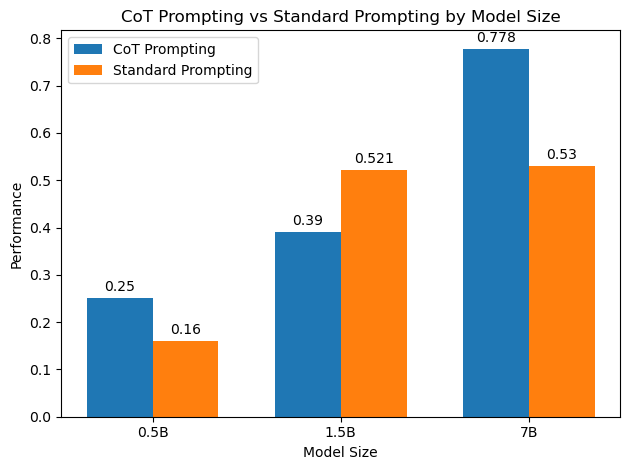

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ["0.5B", "1.5B", "7B"]
cot_prompting = [0.25, 0.39, 0.778]
standard_prompting = [0.16, 0.521, 0.53]

x = np.arange(len(models))  # 模型位置
width = 0.35  # 条形图的宽度

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cot_prompting, width, label='CoT Prompting')
rects2 = ax.bar(x + width/2, standard_prompting, width, label='Standard Prompting')

# 添加一些文本以说明内容
ax.set_xlabel('Model Size')
ax.set_ylabel('Performance')
ax.set_title('CoT Prompting vs Standard Prompting by Model Size')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# 自动标签
def autolabel(rects):
    """附加条形图标签"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


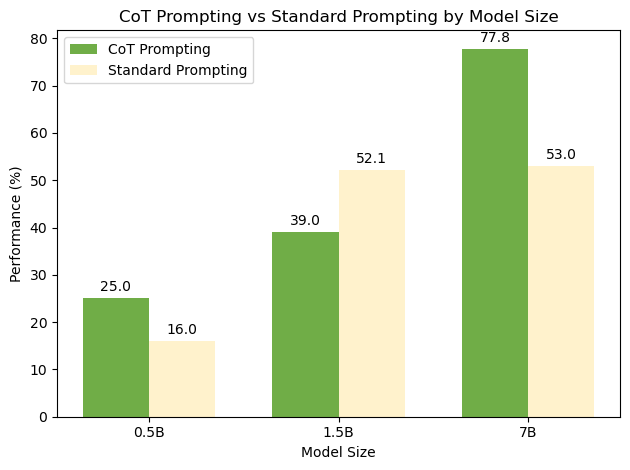

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ["0.5B", "1.5B", "7B"]
cot_prompting = [0.25, 0.39, 0.778]
standard_prompting = [0.16, 0.521, 0.53]

# 将数据转换为百分比
cot_prompting = [x * 100 for x in cot_prompting]
standard_prompting = [x * 100 for x in standard_prompting]

x = np.arange(len(models))  # 模型位置
width = 0.35  # 条形图的宽度

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cot_prompting, width, label='CoT Prompting', color='#70AD47')
rects2 = ax.bar(x + width/2, standard_prompting, width, label='Standard Prompting', color='#FFF2CC')

# 添加一些文本以说明内容
ax.set_xlabel('Model Size')
ax.set_ylabel('Performance (%)')
ax.set_title('CoT Prompting vs Standard Prompting by Model Size')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# 自动标签
def autolabel(rects):
    """附加条形图标签"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


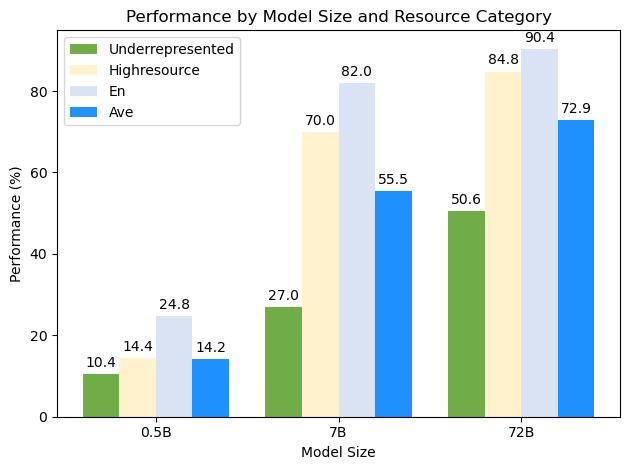

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ["0.5B", "7B", "72B"]
underrepresented = [0.104, 0.27, 0.506]
highresource = [0.144, 0.7, 0.848]
en = [0.248, 0.82, 0.904]
ave = [0.1424, 0.555, 0.729]

# 将数据转换为百分比
underrepresented = [x * 100 for x in underrepresented]
highresource = [x * 100 for x in highresource]
en = [x * 100 for x in en]
ave = [x * 100 for x in ave]

x = np.arange(len(models))  # 模型位置
width = 0.2  # 条形图的宽度

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, underrepresented, width, label='Underrepresented', color='#70AD47')
rects2 = ax.bar(x - 0.5*width, highresource, width, label='Highresource', color='#FFF2CC')
rects3 = ax.bar(x + 0.5*width, en, width, label='En', color='#DAE3F3')
rects4 = ax.bar(x + 1.5*width, ave, width, label='Ave', color='#1E90FF')

# 添加一些文本以说明内容
ax.set_xlabel('Model Size')
ax.set_ylabel('Performance (%)')
ax.set_title('Performance by Model Size and Resource Category')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# 自动标签
def autolabel(rects):
    """附加条形图标签"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()
